<a target="_blank" href="https://colab.research.google.com/github/robgen/HEDSpython/blob/main/Tutorial_7.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

#**Supervised Learning - Linear Regression**

Linear regression the simplest and most commonly used statitical method for predictive analysis and machine learning.

Linear regression predicts the value of a variable given the value of other variables assuming that the relationship between the outcome variable and the predictors is linear.

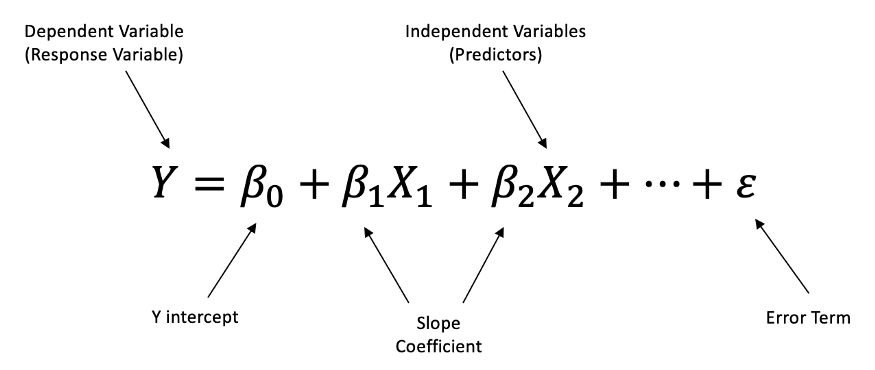

Image from: https://medium.com/swlh/understanding-multiple-linear-regression-e0a93327e960.

Let's import our libraries.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

Then upload and explore our data.

In [ ]:
filePath = 'https://raw.githubusercontent.com/robgen/HEDSpython/refs/heads/main/files/weatherHistory.csv'
weather = pd.read_csv(filePath)

In [ ]:
weather.head(10)

In [ ]:
weather.describe()

Now let's create a subset for the dataframe with the following features:

1. Summary
2. Humidity
3. Apparent Temperature (C)



In [ ]:
temp = weather[["Humidity"]]
temp.head(10)

Convert the categorical variable (Summary) into an indicator variable.

In [ ]:
dummies = pd.get_dummies(weather["Summary"])
dummies.head(12)

Concatenate the two datasets `temp1` and `dummies` to create a single dataframe `X`.

In [ ]:
X = pd.concat([temp,dummies],axis=1)
X.head(12)

Let's take a look at the columns in our dataset

In [ ]:
number = 0
for col in X.columns:
  number += 1
  print('Column Name ', number, ':', col)

Select the variable you want to predict (y).

In [ ]:
y = weather["Apparent Temperature (C)"]

Split the datasets into Training and Testing (conventionally we use 30-20% for testing & 70-80% for training but you can do the split differently too)
 1. Training dataset (X_train, y_train) --> These datasets are used to fit the regression model
 2. Testing  dataset (X_test, y_test)   --> **X_test** is used to predict the dependent variable, while **y_test** is used to evaluate the confidence of the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

Let's fit the regression model using the functions `LinearRegression()`
and `fit()`.

In [ ]:
regressionModel = LinearRegression()
regressionModel.fit(X_train, y_train)

Now we can use the fitted model to predict the y values in our X_test dataset.

In [ ]:
y_prediction= regressionModel.predict(X_test)

We can now look at how the predicted values do against the true values in y_test to visualize the performance of our model.

In [ ]:
result = pd.DataFrame(y_test)
result["y_predict"] = y_prediction
print(result.head(20))

And plot the predictions of our model (blue) over the true data points (black).

In [ ]:
plt.figure(dpi=200)
plt.scatter(X_test['Humidity'], y_test, color='black', s=10)
plt.scatter(X_test["Humidity"], y_prediction , color='blue', s=1)
plt.title('Temperature VS Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

We can see that the model reflects a similar downward trend although it does not represent a great fit for the data.

We can also plot the actual values vs. predicted ones. Ideally, if the predictions are perfect the point will lie on a straight line with slope 1.

In [ ]:
plt.figure(dpi=200)
plt.scatter(y_test, y_prediction, color='black', s=10)
plt.plot([-30, 50], [-30, 50], color='blue')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

The plot does not look like a line with slope 1 so our predictions look far from perfect.

A metric for the accuracy of your model is the **R-squared**. The **R-squared** is measured the proportion of variance in the dependent variable that can be explained by the independent variable.

A good R-squared is above 0.7.

In [ ]:
R_squared = regressionModel.score(X_test,y_test)
print('R_squared', R_squared)

We got an R-squared of 40%. Our model seems to be doing quite bad.

##**Understanding the relationship between variables**

Regression is a powerful machine learning tool which can be used for prediction but also for estimating relationships between variables and their confidence levels.

The **scikit-learn (sklearn)** library is designed primarily for making predictions and does not provide statistical significance for estimated relationships between variables. To access this information we use a different Python library called **statsmodels**, which provides a detailed summary table of the fitted model allowing us to interpret the relationships between variables.

In [ ]:
import statsmodels.api as sm

Because our goal here is estimation, we use the whole dataset without splitting it into training and test sets.

In [ ]:
# fit model
mod = sm.OLS(y.astype(float), X.astype(float)).fit()

In [ ]:
# provide model summary
mod.summary()

As you can see, all the information about the model, including the R-squared, is provided in the summary table.

We interpret the regression coefficients as the expected change in **y** for a one-unit increase in **x**, assuming all other variables remain constant. For example:

---

*For a one-unit increase in humidity (x1), the apparent temperature (y) decreases by 28 units, holding all other variables constant.*

---

The **p-value** (P>|t|) helps us determine whether each coefficient is **statistically significant** (i.e., meaningfully different from zero).

Conventionally, a p-value below or equal to 0.05 is considered good evidence to reject the null hypothesis that the coefficient is equal to zero (i.e., of statistical significance).

In this case, all coefficients appear to be statistically significant, providing evidence that all predictive variables contribute to explaining the dependent variable.

##**Exercise - Simple Linear Regression**

Now let's look at the relationship between max and min temperature in the dataset `weather.csv`. This is called a Simple Linear Regression as one variable (and not multiple ones as above - Multiple Linear Regression) is used to predict another one.

Follow the same steps as above to run your analysis.

**Note:** You may encounter some new errors when you run your code. Read them carefully and try to find a solution on your own. Some of the above steps may not be needed in this case.

*1. Load the data and do some exploratory data analysis.*

*2. Select your outcome variable and your predictor, and divide the data in training and test set (since we are dealing with two variables only, no further data manipulation is needed here).*

*3. Fit a linear regression model and make predictions.*

*4. Plot your predictions on top of the the min and max temperature data.*


*5. Plot the model predictions against the y-test values to visualize the performance of your model.*

*6. Check how well your model did using the R-squared.*

*7. What will be the maximum temperature when the minimum temperature is 25 C° according to our model?*

*8. Produce and print the summary table for the regression results. Is the regression coefficient statistically significant? Provide an interpretation for it.*